https://www.kaggle.com/ashydv/bank-customer-clustering-k-modes-clustering

In [34]:
import pickle
import pandas as pd
gruppo_1_enc = pd.read_pickle("./gruppo_1_enc.pkl")
gruppo_2_enc = pd.read_pickle("./gruppo_2_enc.pkl")
gruppo_1 = pd.read_pickle("./gruppo_1.pkl")
gruppo_2 = pd.read_pickle("./gruppo_2.pkl")

In [35]:
from kmodes.kprototypes import KPrototypes

In [36]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
%matplotlib inline

In [37]:
gruppo_1_red = gruppo_1.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1)
print(gruppo_1_red.columns)

Index(['D_genere', 'D_eta', 'D_Cdl', 'D_Status', 'R_AreeDisciplinari',
       'D_Tipologia_Bisogni', 'D_Tipologia_Attivita',
       'D_PopolazioneStudenti_1'],
      dtype='object')


In [38]:
kproto = KPrototypes(n_clusters=5, init='Huang', verbose=2)

In [39]:
#clustersp = kp.fit_predict(data, categorical=list(range(M - MN, M)))
clusters = kproto.fit_predict(gruppo_1_red, categorical=[0,2,3,4,5,6,7])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 507, ncost: 17042.094832648534
Run: 1, iteration: 2/100, moves: 212, ncost: 16278.041277551696
Run: 1, iteration: 3/100, moves: 245, ncost: 14714.410043338336
Run: 1, iteration: 4/100, moves: 122, ncost: 14317.674455908997
Run: 1, iteration: 5/100, moves: 68, ncost: 14289.93310889393
Run: 1, iteration: 6/100, moves: 0, ncost: 14289.93310889393
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 338, ncost: 15756.941680967691
Run: 2, iteration: 2/100, moves: 178, ncost: 14949.859311814642
Run: 2, iteration: 3/100, moves: 101, ncost: 14649.784271515895
Run: 2, iteration: 4/100, moves: 60, ncost: 14424.997880020039
Run: 2, iteration: 5/100, moves: 53, ncost: 14380.287404910061
Run: 2, iteration: 6/100, moves: 82, ncost: 14158.159379527835
Run: 2, iteration: 7/100, moves: 27, ncost: 14136.59712701826
Run: 2, iteration:

In [40]:
print(kproto.cluster_centroids_)

[array([[19.1975    ],
       [26.08960573],
       [22.15128401],
       [47.09677419],
       [32.87640449]]), array([['femmina', 'triennale', 'in corso', 'Umanistico-Sociale',
        'vissuto emotivo individuale di disagio', 'non so/non risponde',
        'studenti con difficoltà nel metodo di studio'],
       ['maschio', 'triennale', 'fuori corso', 'Umanistico-Sociale',
        'vissuto emotivo individuale di disagio', 'non so/non risponde',
        'studenti con difficoltà emotive legate allo studio es., ansia, paure, ecc.'],
       ['maschio', 'triennale', 'in corso', 'Umanistico-Sociale',
        'non so/non risponde', 'non so/non risponde',
        'studenti che sperimentano uno stato momentaneo di disagio psicologico'],
       ['maschio', 'a ciclo unico', 'fuori corso', 'Umanistico-Sociale',
        'vissuto emotivo individuale di disagio',
        'ascolto, condivisione e gestione del disagio personale',
        'studenti con difficoltà nel metodo di studio'],
       ['masch

In [41]:
print(kproto.cost_)
print(kproto.n_iter_)

14030.656332828185
7


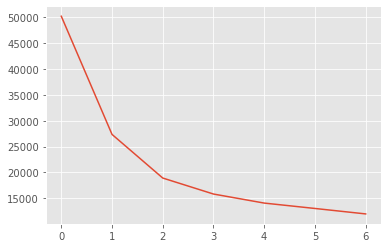

In [42]:
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(gruppo_1_red, categorical=[0,2,3,4,5,6,7])
    cost.append(kproto.cost_)

plt.plot(cost)

---

k-means

In [87]:
gruppo_1 = pd.read_pickle("./gruppo_1.pkl")
gruppo_2 = pd.read_pickle("./gruppo_2.pkl")
gruppo_1.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)
gruppo_2.drop(['D_PopolazioneStudenti_2', 'D_PopolazioneStudenti_3'], axis=1, inplace=True)

In [88]:
gruppo_1['age_bin'] = pd.cut(gruppo_1['D_eta'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
gruppo_1  = gruppo_1.drop('D_eta',axis = 1)

In [89]:
gruppo_1.head()

,D_genere,D_Cdl,D_Status,R_AreeDisciplinari,D_Tipologia_Bisogni,D_Tipologia_Attivita,D_PopolazioneStudenti_1,age_bin
15,maschio,a ciclo unico,in corso,Medica,altro,colloqui individuali,studenti con DSA,0-20
30,maschio,a ciclo unico,in corso,Medica,non so/non risponde,non so/non risponde,studenti con difficoltà nel metodo di studio,0-20
59,maschio,triennale,in corso,Scientifico-Tecnologica,non so/non risponde,non so/non risponde,studenti con difficoltà emotive legate allo st...,0-20
69,maschio,a ciclo unico,in corso,Medica,vissuto emotivo individuale di disagio,non so/non risponde,studenti che sperimentano difficoltà relaziona...,0-20
115,maschio,triennale,in corso,Umanistico-Sociale,empowerment strategie personali e di adattamento,"ascolto, condivisione e gestione del disagio p...",studenti che sperimentano difficoltà nei rappo...,0-20


In [90]:
gruppo_1.shape

(1245, 8)

In [91]:
gruppo_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 15 to 16377
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   D_genere                 1245 non-null   object  
 1   D_Cdl                    1245 non-null   object  
 2   D_Status                 1245 non-null   object  
 3   R_AreeDisciplinari       1245 non-null   object  
 4   D_Tipologia_Bisogni      1245 non-null   object  
 5   D_Tipologia_Attivita     1245 non-null   object  
 6   D_PopolazioneStudenti_1  1245 non-null   object  
 7   age_bin                  1245 non-null   category
dtypes: category(1), object(7)
memory usage: 79.4+ KB


In [92]:
for col in gruppo_1.columns:
    gruppo_1[col] = gruppo_1[col].astype('category')

In [93]:
gruppo_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 15 to 16377
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   D_genere                 1245 non-null   category
 1   D_Cdl                    1245 non-null   category
 2   D_Status                 1245 non-null   category
 3   R_AreeDisciplinari       1245 non-null   category
 4   D_Tipologia_Bisogni      1245 non-null   category
 5   D_Tipologia_Attivita     1245 non-null   category
 6   D_PopolazioneStudenti_1  1245 non-null   category
 7   age_bin                  1245 non-null   category
dtypes: category(8)
memory usage: 21.5 KB


In [94]:
gruppo_1_copy = gruppo_1.copy()

In [95]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
gruppo_1 = gruppo_1.apply(le.fit_transform)

In [96]:
gruppo_1.head()

,D_genere,D_Cdl,D_Status,R_AreeDisciplinari,D_Tipologia_Bisogni,D_Tipologia_Attivita,D_PopolazioneStudenti_1,age_bin
15,1,0,1,0,2,3,3,0
30,1,0,1,0,7,7,5,0
59,1,2,1,2,7,7,4,0
69,1,0,1,0,10,7,1,0
115,1,2,1,3,5,2,0,0


In [97]:
from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(gruppo_1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3987.0


In [98]:
fitClusters_cao


array([1, 2, 0, ..., 2, 2, 2], dtype=uint16)

In [99]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = gruppo_1.columns
clusterCentroidsDf


,D_genere,D_Cdl,D_Status,R_AreeDisciplinari,D_Tipologia_Bisogni,D_Tipologia_Attivita,D_PopolazioneStudenti_1,age_bin
0,1,2,1,3,10,7,4,1
1,1,1,1,2,5,2,2,0
2,0,2,1,3,7,2,5,0


In [100]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(gruppo_1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 230, cost: 4233.0
Run 1, iteration: 2/100, moves: 299, cost: 4046.0
Run 1, iteration: 3/100, moves: 119, cost: 4046.0


In [101]:
fitClusters_huang

array([0, 1, 1, ..., 0, 0, 0], dtype=uint16)

In [102]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(gruppo_1)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4689.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 142, cost: 4215.0
Run 1, iteration: 2/100, moves: 69, cost: 4215.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3987.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 86, cost: 3615.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 192, cost: 3215.0
Run 1, iteration: 2/100, moves: 151, cost: 3215.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 236, cost: 3162.0
Run 1, iteration: 2/100, moves: 128, cost: 3124.0
Run 1, iteration: 3/100, moves: 16, cost: 3124.0
Init: initializing centroid

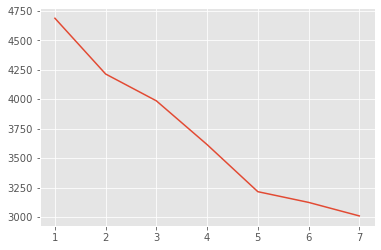

In [103]:
import numpy as np
y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [105]:
gruppo_1 = gruppo_1_copy.reset_index()

In [106]:
gruppo_1.head()

,index,D_genere,D_Cdl,D_Status,R_AreeDisciplinari,D_Tipologia_Bisogni,D_Tipologia_Attivita,D_PopolazioneStudenti_1,age_bin
0,15,maschio,a ciclo unico,in corso,Medica,altro,colloqui individuali,studenti con DSA,0-20
1,30,maschio,a ciclo unico,in corso,Medica,non so/non risponde,non so/non risponde,studenti con difficoltà nel metodo di studio,0-20
2,59,maschio,triennale,in corso,Scientifico-Tecnologica,non so/non risponde,non so/non risponde,studenti con difficoltà emotive legate allo st...,0-20
3,69,maschio,a ciclo unico,in corso,Medica,vissuto emotivo individuale di disagio,non so/non risponde,studenti che sperimentano difficoltà relaziona...,0-20
4,115,maschio,triennale,in corso,Umanistico-Sociale,empowerment strategie personali e di adattamento,"ascolto, condivisione e gestione del disagio p...",studenti che sperimentano difficoltà nei rappo...,0-20


In [107]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(gruppo_1)
print(fitClusters_cao)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 142, cost: 5458.0
Run 1, iteration: 2/100, moves: 69, cost: 5458.0
[1 0 0 ... 0 0 0]


In [110]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([gruppo_1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [111]:
combinedDf.head()


,D_genere,D_Cdl,D_Status,R_AreeDisciplinari,D_Tipologia_Bisogni,D_Tipologia_Attivita,D_PopolazioneStudenti_1,age_bin,cluster_predicted
0,maschio,a ciclo unico,in corso,Medica,altro,colloqui individuali,studenti con DSA,0-20,1
1,maschio,a ciclo unico,in corso,Medica,non so/non risponde,non so/non risponde,studenti con difficoltà nel metodo di studio,0-20,0
2,maschio,triennale,in corso,Scientifico-Tecnologica,non so/non risponde,non so/non risponde,studenti con difficoltà emotive legate allo st...,0-20,0
3,maschio,a ciclo unico,in corso,Medica,vissuto emotivo individuale di disagio,non so/non risponde,studenti che sperimentano difficoltà relaziona...,0-20,0
4,maschio,triennale,in corso,Umanistico-Sociale,empowerment strategie personali e di adattamento,"ascolto, condivisione e gestione del disagio p...",studenti che sperimentano difficoltà nei rappo...,0-20,1


In [112]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [113]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 1 to 1244
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   D_genere                 953 non-null    category
 1   D_Cdl                    953 non-null    category
 2   D_Status                 953 non-null    category
 3   R_AreeDisciplinari       953 non-null    category
 4   D_Tipologia_Bisogni      953 non-null    category
 5   D_Tipologia_Attivita     953 non-null    category
 6   D_PopolazioneStudenti_1  953 non-null    category
 7   age_bin                  953 non-null    category
 8   cluster_predicted        953 non-null    uint16  
dtypes: category(8), uint16(1)
memory usage: 18.8 KB


In [114]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 1237
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   D_genere                 292 non-null    category
 1   D_Cdl                    292 non-null    category
 2   D_Status                 292 non-null    category
 3   R_AreeDisciplinari       292 non-null    category
 4   D_Tipologia_Bisogni      292 non-null    category
 5   D_Tipologia_Attivita     292 non-null    category
 6   D_PopolazioneStudenti_1  292 non-null    category
 7   age_bin                  292 non-null    category
 8   cluster_predicted        292 non-null    uint16  
dtypes: category(8), uint16(1)
memory usage: 7.2 KB


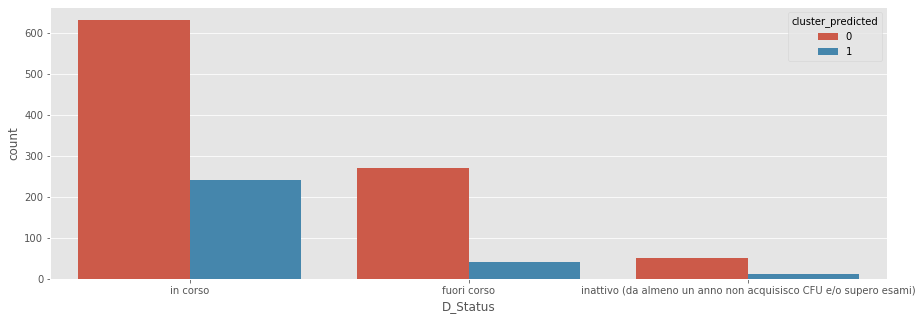

In [116]:
import seaborn as sns
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['D_Status'],order=combinedDf['D_Status'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

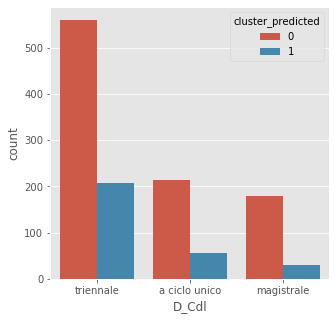

In [117]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['D_Cdl'],order=combinedDf['D_Cdl'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

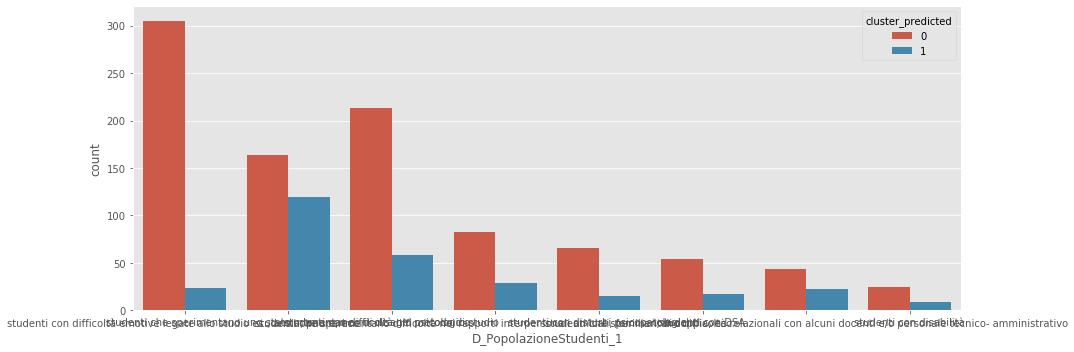

In [119]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['D_PopolazioneStudenti_1'],order=combinedDf['D_PopolazioneStudenti_1'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.tight_layout()
plt.show()

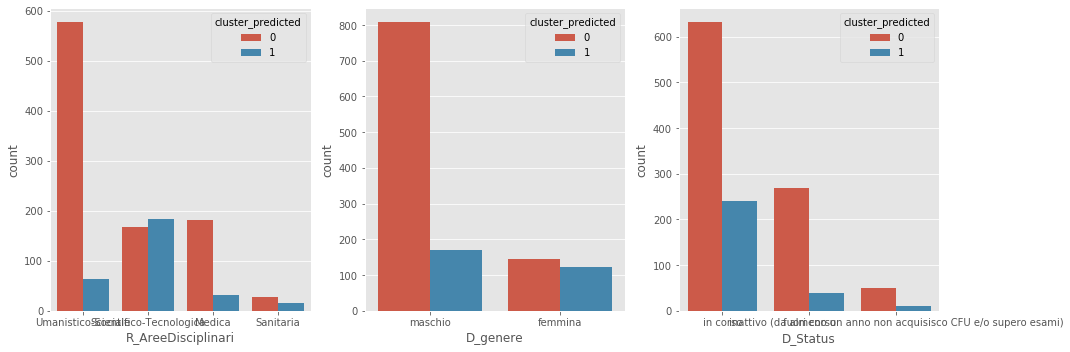

In [120]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['R_AreeDisciplinari'],order=combinedDf['R_AreeDisciplinari'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['D_genere'],order=combinedDf['D_genere'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['D_Status'],order=combinedDf['D_Status'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

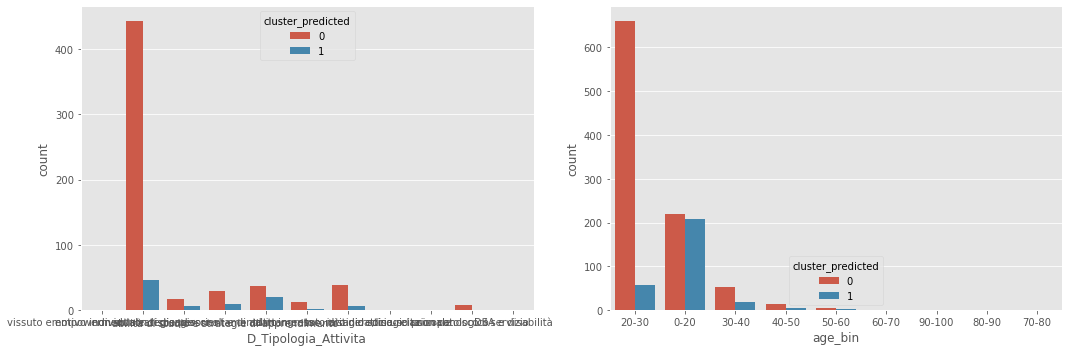

In [124]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['D_Tipologia_Attivita'],order=combinedDf['D_Tipologia_Bisogni'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()